In [2]:
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats

In [63]:
df = pd.read_csv('D:\File_Analisa_Python/nycrollingsales.csv') #insert file from local drive


## Change anomaly values
df['SALE PRICE'] = df['SALE PRICE'].replace(' -  ',0).astype(float) #replace - (dash) to zero and convert it to float

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])   #convert SALE DATE to Datetime

df = df.rename(columns={'Unnamed: 0': 'KEY'})   #rename column Unnamed 0 to KEY

df['YEAR BUILT'] = df['YEAR BUILT'].replace(0,1900)
df['YEAR BUILT'] = df['YEAR BUILT'].replace(1111,1900)          #change year built from 0 to 1900 and 1111 to 1900

df['EASE-MENT'] = df['EASE-MENT'].replace(' ','-')          #fill column Ease-ment with - (dash)

df.describe()

,KEY,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1945.965227,1.657485,1.056623e+06
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,35.537798,0.819341,1.038794e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1680.000000,1.000000,0.000000e+00
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,4.150000e+05
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,8.300000e+05
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


In [64]:
mean_nyc = df['SALE PRICE'].mean()
median_nyc = df['SALE PRICE'].median()
modus_nyc = statistics.mode(df['SALE PRICE'])

print('Rata - rata harga jual rumah di NYC adalah',mean_nyc,'dolar')
print('')
print('dan untuk nilai tengah dari harga jual rumah tersebut sebesar',median_nyc,'dolar')
print('')
print('sedangkan untuk harga rumah paling banyak dijual seharga',modus_nyc, 'dolar atau banyak orang tua yang mewariskan rumahnya kepada anak / keluarganya')


Rata - rata harga jual rumah di NYC adalah 1056622.9941453375 dolar

dan untuk nilai tengah dari harga jual rumah tersebut sebesar 415000.0 dolar

sedangkan untuk harga rumah paling banyak dijual seharga 0.0 dolar atau banyak orang tua yang mewariskan rumahnya kepada anak / keluarganya


In [88]:
df['YEAR BUILT'].max()

df['YEAR BUILT'].min()

range = df['YEAR BUILT'].max() - df['YEAR BUILT'].min()

print('Rentang waktu (tahun) list rumah pada data ini dibangun yaitu',range,'tahun')

Rentang waktu (tahun) list rumah pada data ini dibangun yaitu 337 tahun


<Axes: xlabel='YEAR BUILT'>

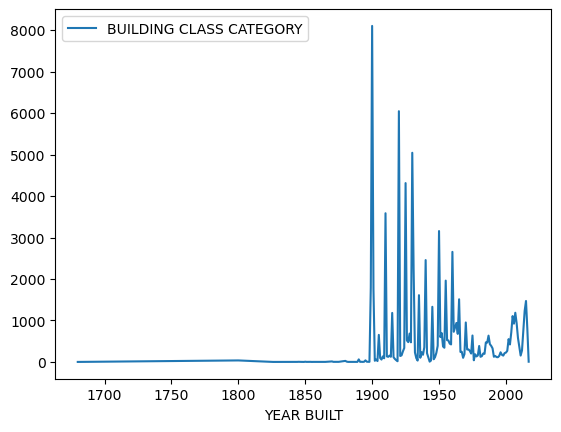

In [84]:
df[['BUILDING CLASS CATEGORY','YEAR BUILT']].groupby('YEAR BUILT').count().plot()

In [77]:
df

,KEY,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,-,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,-,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,0.0,2016-12-14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,-,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,0.0,2016-12-09
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,-,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,-,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,-,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000.0,2016-11-28
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,-,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000.0,2017-04-21
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,-,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000.0,2017-07-05
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,-,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337.0,2016-12-21
